<a href="https://colab.research.google.com/github/majetikalyan007/ML-algorithms/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

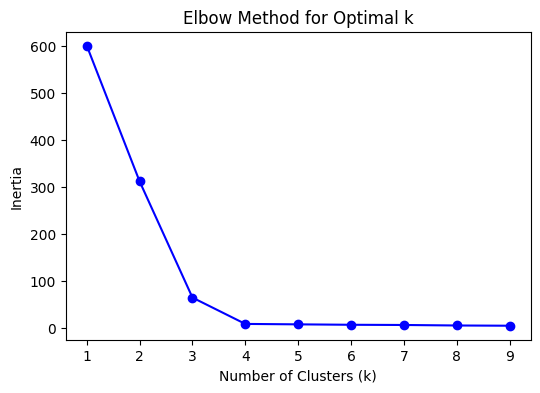

Silhouette Score: 0.859


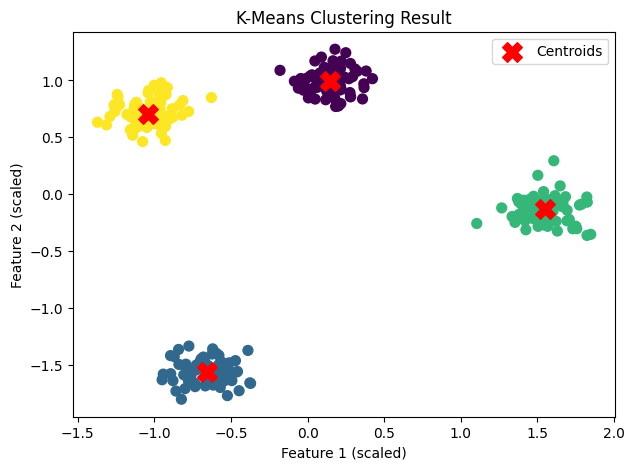

In [1]:
# ---------------------------------------------------------------
# K-Means Clustering Implementation in Python
# ---------------------------------------------------------------

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load or create dataset
# Example: create sample data (you can replace this with pd.read_csv('yourfile.csv'))
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Find the optimal number of clusters using Elbow Method
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Step 4: Apply K-Means with the optimal k (say k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: Evaluate using Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.3f}")

# Step 6: Visualize the clusters
plt.figure(figsize=(7, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
